In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [3]:
ccm_analytics= pd.read_csv('CCM_Analytics.csv')
ccm_analytics.head()

,DateOfGame,Opponent,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,...,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored,WinOrLoss,OffensiveRebounds,Turnovers,OffensiveEfficency,EfficentPoints,TotalPoint
0,1/19/2021,GB SouthWest,11,6,3,15,9,6,2,2,...,3,0.857143,6,93,Win,0,4,0.600000,15.600000,26
1,1/22/2021,Hortonville,7,6,0,1,6,2,2,2,...,1.5,0.000000,7,96,Win,0,2,0.428571,3.428571,8
2,1/23/2021,Appleton West,15,12,5,10,6,3,0,0,...,1.714285714,1.285714,11,99,Win,0,0,0.703704,17.592593,25
3,12/8/2020,Appleton East,10,10,4,30,12,8,2,2,...,0,1.000000,6,86,Win,0,5,0.545455,21.818182,40
4,1/29/2021,Kimberly,10,8,3,10,11,4,2,2,...,1.5,0.000000,7,65,Loss,1,3,0.500000,10.000000,20


In [4]:
# Check to see if any columns do not have a value 
ccm_analytics.isna().sum()

DateOfGame                                      0
Opponent                                        0
FirstHalfPoint                                  0
FirstHalfFieldGoalAttempts                      0
FirstHalfFieldGoalsMade                         0
SecondHalfPoint                                 0
SecondHalfFieldGoalAttempts                     0
SecondHalfFieldGoalsMade                        0
FreeThrowsAttemptedFirstHalf                    0
FreeThrowsMadeFirstHalf                         0
FreeThrowsAttemptedSecondHalf                   0
FreeThrowsMadeSecondHalf                        0
FreeThrowsAttemptedTotal                        0
FreeThrowsMadeTotal                             0
FieldGoalsAttemptedTotal                        0
FieldGoalsMadeTotal                             0
2PointFieldGoalsAttemptedTotal                  0
2PointFieldGoalsMadeTotal                       0
3PointFieldGoalsAttemptedTotal                  0
3PointFieldGoalsMadeTotal                       0


In [5]:
# Checking to see if any are null
ccm_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   DateOfGame                                    11 non-null     object 
 1   Opponent                                      11 non-null     object 
 2   FirstHalfPoint                                11 non-null     int64  
 3   FirstHalfFieldGoalAttempts                    11 non-null     int64  
 4   FirstHalfFieldGoalsMade                       11 non-null     int64  
 5   SecondHalfPoint                               11 non-null     int64  
 6   SecondHalfFieldGoalAttempts                   11 non-null     int64  
 7   SecondHalfFieldGoalsMade                      11 non-null     int64  
 8   FreeThrowsAttemptedFirstHalf                  11 non-null     int64  
 9   FreeThrowsMadeFirstHalf                       11 non-null     int64

In [6]:
#Replace #DIV/0! error with 0 (Cleaning data)
ccm_analytics = ccm_analytics.replace('#DIV/0!', 0)

In [7]:
# Get the names of all the columns
ccm_analytics.describe().columns

Index(['FirstHalfPoint', 'FirstHalfFieldGoalAttempts',
       'FirstHalfFieldGoalsMade', 'SecondHalfPoint',
       'SecondHalfFieldGoalAttempts', 'SecondHalfFieldGoalsMade',
       'FreeThrowsAttemptedFirstHalf', 'FreeThrowsMadeFirstHalf',
       'FreeThrowsAttemptedSecondHalf', 'FreeThrowsMadeSecondHalf',
       'FreeThrowsAttemptedTotal', 'FreeThrowsMadeTotal',
       'FieldGoalsAttemptedTotal', 'FieldGoalsMadeTotal',
       '2PointFieldGoalsAttemptedTotal', '2PointFieldGoalsMadeTotal',
       '3PointFieldGoalsAttemptedTotal', '3PointFieldGoalsMadeTotal',
       'FieldGoalsAttemptedOpenTotal', 'FieldGoalsMadeOpenTotal',
       'FieldGoalsAttemptedGuardedTotal', 'FieldGoalsMadeGuardedTotal',
       '2PointFieldGoalsAttemptedOpenTotal', '2PointFieldGoalsMadeOpenTotal',
       '2PointFieldGoalsAttemptedGuardedTotal',
       '2PointFieldGoalsMadeGuardedTotal ',
       '3PointFieldGoalsAttemptedOpenTotal', '3PointFieldGoalsMadeOpenTotal',
       '3PointFieldGoalsAttemptetGuardedTotal',
  

In [8]:
# Seperate Numerical and Categorical data
df_num = ccm_analytics.drop(columns = ['DateOfGame', 'Opponent', 'WinOrLoss'])
df_num

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,FreeThrowsMadeSecondHalf,...,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored,OffensiveRebounds,Turnovers,OffensiveEfficency,EfficentPoints,TotalPoint
0,11,6,3,15,9,6,2,2,2,2,...,1.600000,3,0.857143,6,93,0,4,0.600000,15.600000,26
1,7,6,0,1,6,2,2,2,2,1,...,0.500000,1.5,0.000000,7,96,0,2,0.428571,3.428571,8
2,15,12,5,10,6,3,0,0,3,2,...,0.500000,1.714285714,1.285714,11,99,0,0,0.703704,17.592593,25
3,10,10,4,30,12,8,2,2,13,13,...,1.250000,0,1.000000,6,86,0,5,0.545455,21.818182,40
4,10,8,3,10,11,4,2,2,1,1,...,0.888889,1.5,0.000000,7,65,1,3,0.500000,10.000000,20
5,7,4,2,9,4,2,2,2,4,3,...,1.000000,0,1.800000,7,57,0,4,0.578947,9.263158,16
6,12,6,3,15,8,6,5,4,2,1,...,1.428571,0,1.714286,11,78,0,2,0.740741,20.000000,27
7,13,11,5,20,12,8,0,0,4,2,...,1.166667,1.8,1.200000,9,92,0,7,0.564103,18.615385,33
8,0,5,0,12,6,4,0,0,3,2,...,0.666667,3,0.500000,6,66,0,1,0.555556,6.666667,12
9,18,7,7,10,7,2,1,1,8,6,...,1.250000,2,1.500000,7,105,1,0,0.800000,22.400000,28


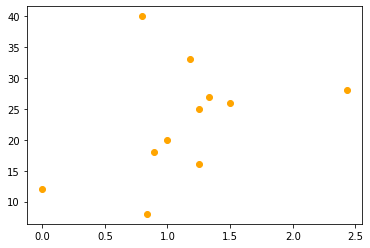

In [9]:
# Scatter Plots
plt.scatter(df_num.PointsPerAttemptFirstHalf.values, df_num.TotalPoint.values, marker ='o', color = 'orange')

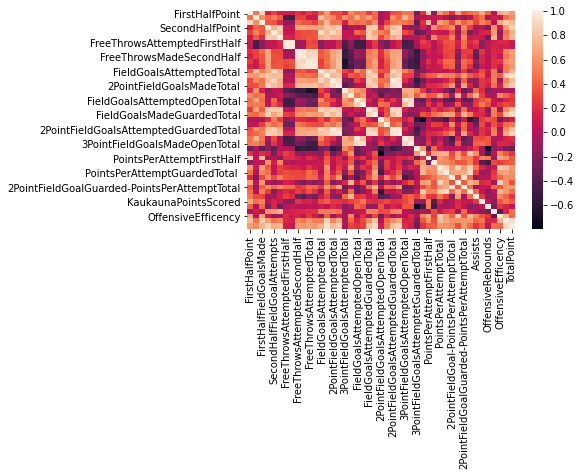

In [10]:
#Heat map correlations
shooting_correlation = df_num.corr()
sns.heatmap(shooting_correlation);

In [11]:
#Find correlations
shooting_correlation

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,FreeThrowsMadeSecondHalf,...,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored,OffensiveRebounds,Turnovers,OffensiveEfficency,EfficentPoints,TotalPoint
FirstHalfPoint,1.000000,0.484985,0.898368,0.147825,2.797514e-01,0.109157,0.110650,0.097263,0.223052,0.141802,...,0.656219,0.361818,0.451018,0.506279,0.679548,0.412369,-0.018927,0.671351,0.781898,0.629690
FirstHalfFieldGoalAttempts,0.484985,1.000000,0.588775,0.417519,5.200883e-01,0.379732,-0.441811,-0.468495,0.288339,0.279603,...,0.018818,-0.130025,0.009630,0.323056,0.466607,-0.026135,0.132755,0.050694,0.456245,0.577029
FirstHalfFieldGoalsMade,0.898368,0.588775,1.000000,0.365488,3.568120e-01,0.193649,-0.155885,-0.175933,0.437855,0.356383,...,0.617762,0.401140,0.521762,0.310530,0.547017,0.430331,0.015802,0.667330,0.845065,0.748463
SecondHalfPoint,0.147825,0.417519,0.365488,1.000000,7.214911e-01,0.874296,0.063304,0.052996,0.670079,0.695372,...,0.006018,0.560000,0.282265,-0.027023,0.035720,-0.202218,0.581651,0.106589,0.661812,0.861396
SecondHalfFieldGoalAttempts,0.279751,0.520088,0.356812,0.721491,1.000000e+00,0.829156,0.074162,0.086919,0.312464,0.348485,...,-0.117085,0.447192,-0.209726,-0.018467,0.161941,0.184257,0.642751,-0.150469,0.472718,0.710388
SecondHalfFieldGoalsMade,0.109157,0.379732,0.193649,0.874296,8.291562e-01,1.000000,0.178885,0.154160,0.306140,0.328140,...,0.002069,0.557480,0.092211,0.133631,0.082617,-0.294118,0.721788,-0.026768,0.530241,0.742799
FreeThrowsAttemptedFirstHalf,0.110650,-0.441811,-0.155885,0.063304,7.416198e-02,0.178885,1.000000,0.989183,-0.094145,-0.052970,...,0.157944,0.458513,0.193696,0.286855,-0.171478,0.014907,0.114950,0.195161,0.181973,0.106551
FreeThrowsMadeFirstHalf,0.097263,-0.468495,-0.175933,0.052996,8.691919e-02,0.154160,0.989183,1.000000,-0.061300,-0.010013,...,0.100639,0.450366,0.133722,0.199618,-0.175684,0.052414,0.157177,0.126039,0.142834,0.091579
FreeThrowsAttemptedSecondHalf,0.223052,0.288339,0.437855,0.670079,3.124641e-01,0.306140,-0.094145,-0.061300,1.000000,0.977115,...,-0.129625,0.264291,0.286991,-0.270892,0.247228,0.045481,0.180127,0.161303,0.551481,0.640886
FreeThrowsMadeSecondHalf,0.141802,0.279603,0.356383,0.695372,3.484847e-01,0.328140,-0.052970,-0.010013,0.977115,1.000000,...,-0.246847,0.280652,0.192451,-0.362509,0.165927,0.019104,0.185894,0.056219,0.485982,0.619025


In [12]:
#Pivot table to see assits and point spread in first and second half
new_table = pd.pivot_table(ccm_analytics, index = 'TotalPoint', values = ['FirstHalfPoint', 'FirstHalfFieldGoalAttempts', 'FreeThrowsAttemptedFirstHalf', 'PointsPerAttemptFirstHalf'])
new_table

,FirstHalfFieldGoalAttempts,FirstHalfPoint,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
TotalPoint,,,,
8,6,7,2,0.833333
12,5,0,0,0.000000
16,4,7,2,1.250000
18,9,7,0,0.888889
20,8,10,2,1.000000
25,12,15,0,1.250000
26,6,11,2,1.500000
27,6,12,5,1.333333
28,7,18,1,2.428571


In [13]:
# Going to machine learn to predict total points based on first half stats
y = ccm_analytics.TotalPoint
y


0     26
1      8
2     25
3     40
4     20
5     16
6     27
7     33
8     12
9     28
10    18
Name: TotalPoint, dtype: int64

In [14]:
# What to use from data to predict total points
ccm_features= ['FirstHalfPoint', 'FirstHalfFieldGoalAttempts', 'FreeThrowsAttemptedFirstHalf', 'PointsPerAttemptFirstHalf']


In [15]:
# Look at data to be used in prediction
X = ccm_analytics[ccm_features]
X.describe()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
count,11.000000,11.000000,11.000000,11.000000
mean,10.000000,7.636364,1.454545,1.133268
std,4.795832,2.579641,1.507557,0.586920
min,0.000000,4.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.861111
50%,10.000000,7.000000,2.000000,1.181818
75%,12.500000,9.500000,2.000000,1.291667
max,18.000000,12.000000,5.000000,2.428571


In [16]:
# Look at first 5 values of prediction values
X.head()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
0,11,6,2,1.500000
1,7,6,2,0.833333
2,15,12,0,1.250000
3,10,10,2,0.800000
4,10,8,2,1.000000


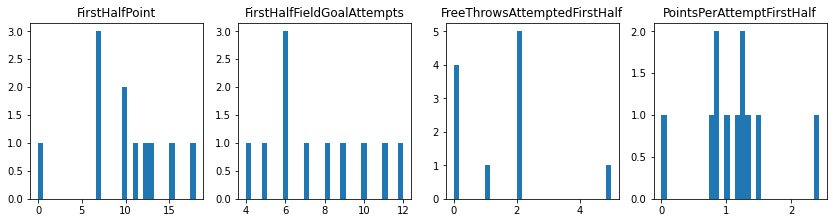

In [17]:
# See distributions for X values 
cols = list(X)
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)
for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(X[cols[i]], bins=30)
    plt.title(cols[i])

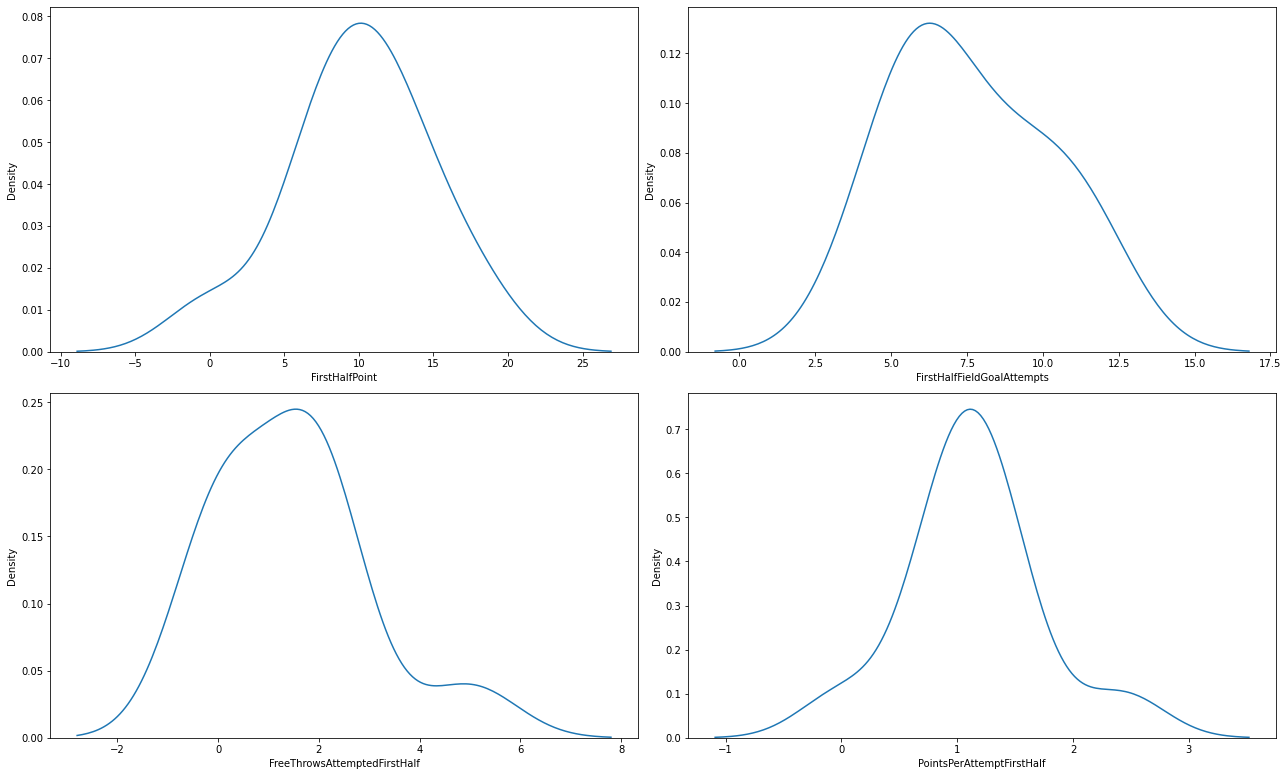

In [18]:

# Create a 3x5 matrix of subplots and add padding around them for readability.
fig, axes = plt.subplots(2, 2, figsize=(18, 11))
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a KDE for each one.
for i in range(len(cols)):
    sns.kdeplot(ax=axes[i//2, i%2], data=X[cols[i]])

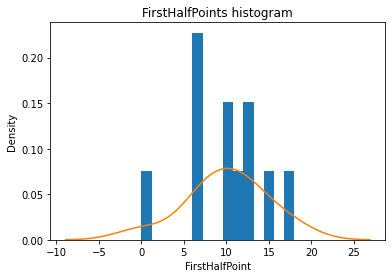

In [19]:
# Plot the KDE for 'FirstHalfPoints' over the probability-density histogram.
plt.hist(X['FirstHalfPoint'], density=True, bins=15)
plt.title('FirstHalfPoints histogram')
sns.kdeplot(X['FirstHalfPoint']);

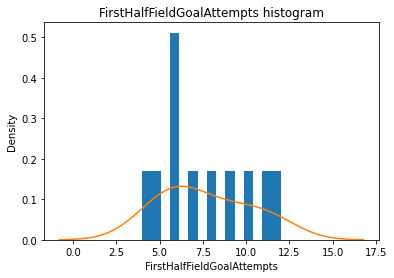

In [20]:
# Plot the KDE for 'FirstHalfFieldGoalAttempts' over the probability-density histogram.
plt.hist(X['FirstHalfFieldGoalAttempts'], density=True, bins=15)
plt.title('FirstHalfFieldGoalAttempts histogram')
sns.kdeplot(X['FirstHalfFieldGoalAttempts']);

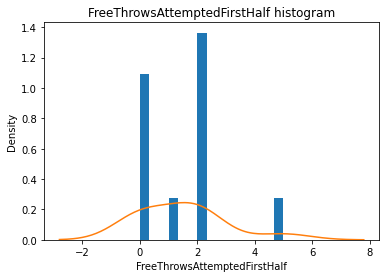

In [21]:
# Plot the KDE for 'FreeThrowsAttemptedFirstHalf' over the probability-density histogram.
plt.hist(X['FreeThrowsAttemptedFirstHalf'], density=True, bins=15)
plt.title('FreeThrowsAttemptedFirstHalf histogram')
sns.kdeplot(X['FreeThrowsAttemptedFirstHalf']);

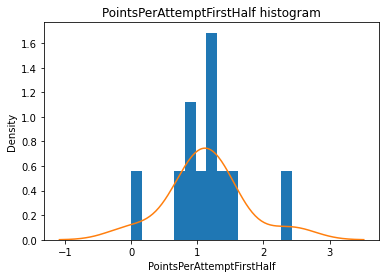

In [22]:
# Plot the KDE for 'PointsPerAttemptFirstHalf' over the probability-density histogram.
plt.hist(X['PointsPerAttemptFirstHalf'], density=True, bins=15)
plt.title('PointsPerAttemptFirstHalf histogram')
sns.kdeplot(X['PointsPerAttemptFirstHalf']);

In [23]:
# Used Decision Tree Regressor to split prediction values
from sklearn.tree import DecisionTreeRegressor
ccm_model = DecisionTreeRegressor(random_state = 1)
ccm_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [24]:
print("Making predictions for the following 5 games:")
print(X.head())
print("The predicitions are")
print(ccm_model.predict(X.head()))
print("Actual values:", y.head().values)

Making predictions for the following 5 games:
   FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirstHalf  \
0              11                           6                             2   
1               7                           6                             2   
2              15                          12                             0   
3              10                          10                             2   
4              10                           8                             2   

   PointsPerAttemptFirstHalf  
0                   1.500000  
1                   0.833333  
2                   1.250000  
3                   0.800000  
4                   1.000000  
The predicitions are
[26.  8. 25. 40. 20.]
Actual values: [26  8 25 40 20]


In [25]:
# Model validation 
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1234)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)
ccm_model = DecisionTreeRegressor()
ccm_model.fit(train_X, train_y)
val_predictions = ccm_model.predict(val_X)
print("Predicition values:", val_predictions)
print("Actual values:", val_y.values)
print("Mean absolute error: ", mean_absolute_error(val_y, val_predictions))

(8, 4) (3, 4) (8,) (3,)
Predicition values: [ 8. 33. 26.]
Actual values: [12 25 28]
Mean absolute error:  4.666666666666667


In [26]:
# See if underfitting or overfitting and implement changes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y) :
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state = 1234)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [27]:
# Setting different tree sizes
candidate_max_leaf_nodes = {5, 25, 50, 100, 250, 500}
scores = {leaf_size : get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes
best_tree_size = best_tree_size = min(scores, key = scores.get)

In [28]:
# Create final model
final_ccm_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 1234)
final_ccm_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=5, random_state=1234)

In [29]:
# Finding mean absolute error
final_ccm_model_prediction = final_ccm_model.predict(val_X)
print(mean_absolute_error(val_y, final_ccm_model_prediction))

1.6666666666666667


In [30]:
# Using Random Forest and letting it iterate 400 times through the data 

rf_model = RandomForestRegressor(n_estimators = 400, random_state = 1234)
rf_model_fit = rf_model.fit(train_X, train_y)
ccm_rf_predict = rf_model_fit.predict(val_X)
print("Machine Learning Prediction val_X values:", val_X)
print("Machine Learning Prediction for val_y:", ccm_rf_predict)

print("Actual values for val_y: " ,val_y.values)

print("Mean absolute error:", mean_absolute_error(val_y, ccm_rf_predict))



Machine Learning Prediction val_X values:    FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirstHalf  \
8               0                           5                             0   
2              15                          12                             0   
9              18                           7                             1   

   PointsPerAttemptFirstHalf  
8                   0.000000  
2                   1.250000  
9                   2.428571  
Machine Learning Prediction for val_y: [14.6025 31.725  26.2475]
Actual values for val_y:  [12 25 28]
Mean absolute error: 3.693333333333334


In [31]:
# Create function for score_dataset
def score_dataset(train_X, val_x, train_y, val_y):
    model = RandomForestRegressor(n_estimators = 200, random_state = 1234)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

In [32]:
# Create pipeline

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', rf_model)
                             ])
my_pipeline.fit(train_X, train_y)
predict_pip = my_pipeline.predict(val_X)
score = mean_absolute_error(val_y, predict_pip)
print("MAE:", score)

MAE: 3.693333333333334


In [33]:
# Create cross validation score
scores = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [ 6.74    10.37125  1.305    6.2675   3.12125]


In [34]:
# Print average MAE score
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
5.561000000000001


In [35]:
# Use xgboost with early stopping rounds that stops running after 5 straight rounds of deteriorating validation scores. Learning rate lets us itterate more but not overfit the data by raising the learning rate(default is 0.01)

ccm_xgb_model = XGBRegressor(n_estimators=1000, learning_rate = 0.05)
ccm_xgb_model.fit(train_X, train_y, early_stopping_rounds = 5, eval_set = [(val_X, val_y)], verbose= False)
xgb_model_predictions = ccm_xgb_model.predict(val_X)
print("Machine learning predicting values with XGBRegressor: ", xgb_model_predictions)
print("Actual values :", val_y.values)
print("MAE: " + str(mean_absolute_error(xgb_model_predictions, val_y)))

Machine learning predicting values with XGBRegressor:  [10.826133 31.492828 24.379656]
Actual values : [12 25 28]
MAE: 3.7623465855916343


In [36]:
# Create pipeline for XGBRegressor model
new_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model',ccm_xgb_model)
                             ])
new_pipeline.fit(train_X, train_y)
predict_pip = my_pipeline.predict(val_X)
score = mean_absolute_error(val_y, predict_pip)
print("MAE:", score)

MAE: 3.693333333333334


In [37]:
# MAE Scores for XGB model
scores_xgb = -1 * cross_val_score(new_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores_xgb)
print("Mean MAE score: \n", scores_xgb.mean())

MAE scores:
 [ 6.09085846 14.51208496  4.10526228 12.05598164  2.50904655]
Mean MAE score: 
 7.854646778106689


In [38]:
# MAE score for RandomForestRegressor model
scores_rf = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores_rf)
print("Mean MAE score: \n", scores_rf.mean())

MAE scores:
 [ 6.74    10.37125  1.305    6.2675   3.12125]
Mean MAE score: 
 5.561000000000001


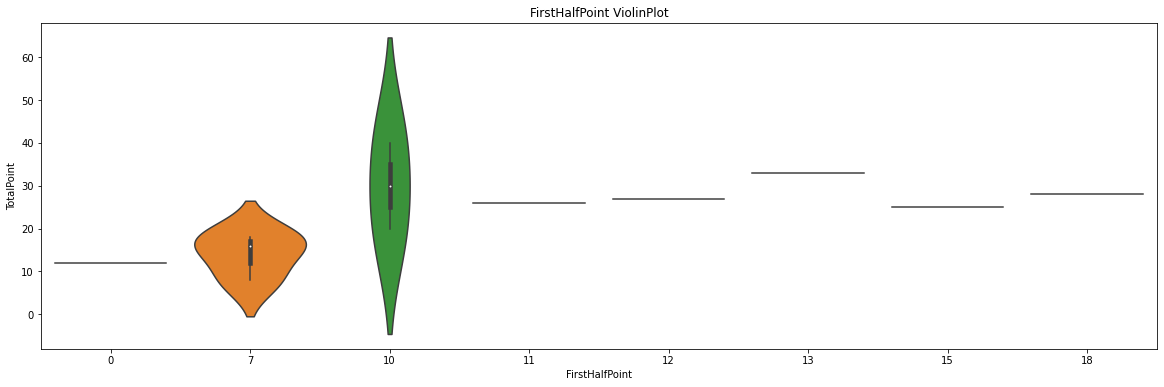

In [39]:
plt.figure(figsize = (20,6))
sns.violinplot(x = 'FirstHalfPoint', y ='TotalPoint', data = df_num).set_title('FirstHalfPoint ViolinPlot')
plt.show()

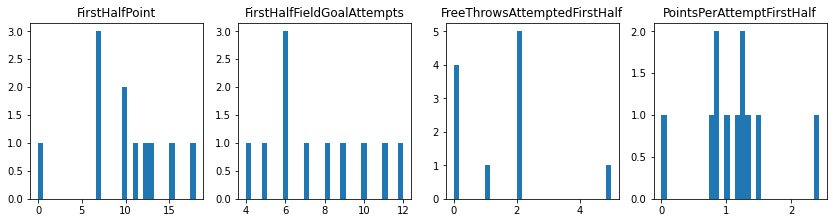

In [40]:
cols = list(X)
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)
for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(X[cols[i]], bins=30)
    plt.title(cols[i])